In [1]:
%load_ext autoreload
%autoreload 2

import pymc3 as pm
import numpy as np
import math as m
import matplotlib.pyplot as plt
import dive 
import deerlab as dl
from scipy.io import loadmat

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


## Load and display data

In [2]:
loaded_data = np.genfromtxt("../../data/3992_good2.dat", skip_header = 1, delimiter = ',')
Pid = 3992
t = loaded_data[:,0]
Vexp = loaded_data[:,1]

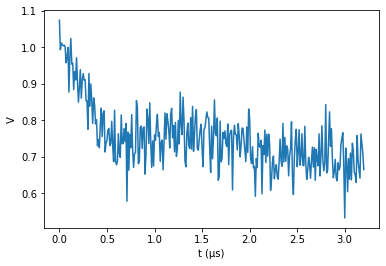

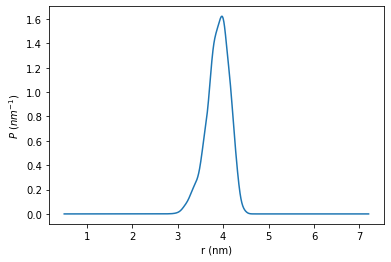

In [3]:
plt.plot(t, Vexp)
plt.xlabel('t (µs)')
plt.ylabel('V')
plt.show()

P0s = loadmat('..\..\data\edwards_testset\distributions_2LZM.mat')['P0']
rref = np.squeeze(loadmat('..\..\data\edwards_testset\distributions_2LZM.mat')['r0'])
Pref = P0s[Pid-1,:]

plt.plot(rref, Pref)
plt.xlabel('r (nm)')
plt.ylabel(r'$P~(nm^{-1})$')
plt.show()



## Regularization

In [4]:
pars = {"method": 'regularization', "r": np.linspace(2,6,200)}

model = dive.model(t, Vexp, pars)

MCMCparameters = {"draws": 4000,"tune": 1000, "chains": 4, 'cores': 4}
trace = dive.sample(model,MCMCparameters)

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>SamplePfromV: [P]
>randTau: [tau]
>randDelta: [delta]
>NUTS: [k, V0, lamb]


Sampling 4 chains for 1_000 tune and 4_000 draw iterations (4_000 + 16_000 draws total) took 1383 seconds.
WARNING (aesara.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
The estimated number of effective samples is smaller than 200 for some parameters.


mean          sd    hdi_3%     hdi_97%  mcse_mean    mcse_sd  \
k           0.048       0.005     0.038       0.058      0.000      0.000   
λ           0.225       0.015     0.199       0.254      0.000      0.000   
V₀          0.959       0.016     0.929       0.990      0.000      0.000   
σ           0.049       0.002     0.045       0.052      0.000      0.000   
δ      265227.067  377991.598  5677.526  876978.829  39913.021  28315.061   
lg(α)       1.241       0.271     0.780       1.726      0.037      0.026   

       ess_bulk  ess_tail  r_hat  
k        5007.0    4923.0   1.00  
λ        3525.0    4564.0   1.00  
V₀       2687.0    5431.0   1.00  
σ        2111.0   11903.0   1.00  
δ          56.0     238.0   1.04  
lg(α)      56.0     243.0   1.04

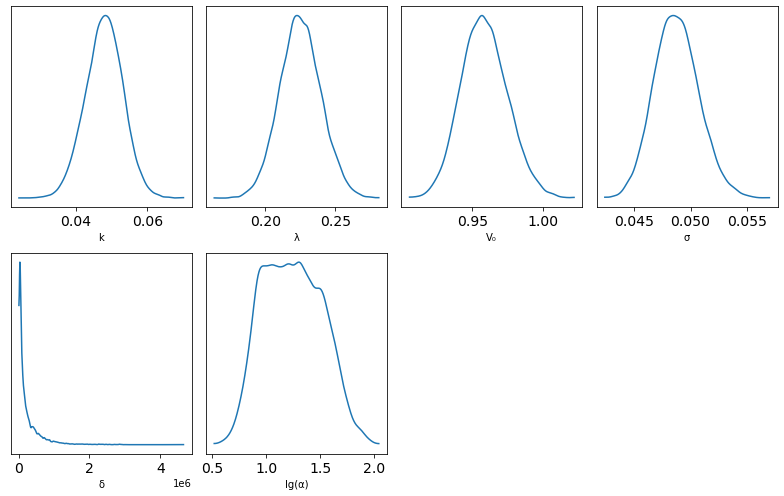

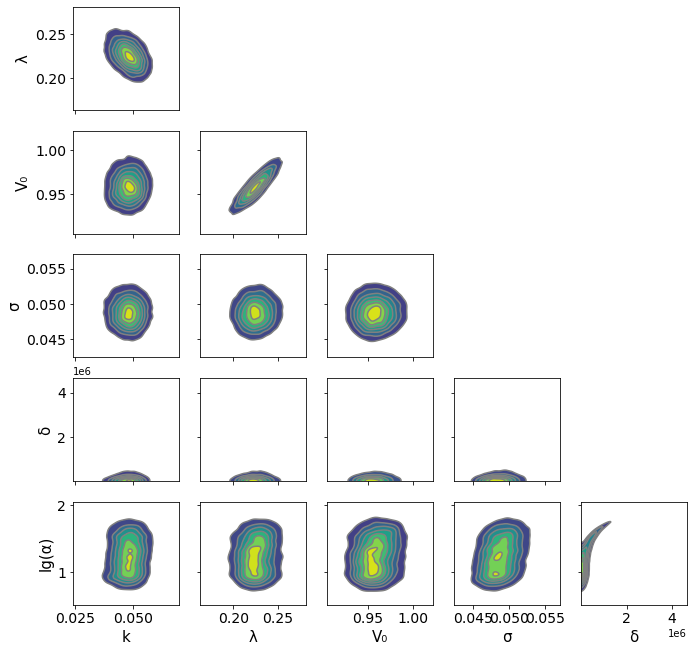

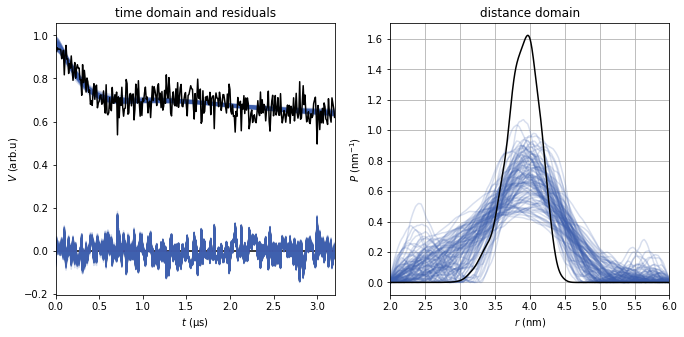

In [5]:
dive.summary(trace, model, Pid = Pid)  

## Single Gaussian

In [6]:
pars_gauss = {"method": 'gaussian', "r": np.linspace(2,6,200), 'nGauss': 1}

model_gauss = dive.model(t, Vexp, pars_gauss)

MCMCparameters = {"draws": 5000,"tune": 1000, "chains": 4, 'cores': 4}
trace_gauss = dive.sample(model_gauss,MCMCparameters)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, V0, lamb, k, w, r0_rel]


Sampling 4 chains for 1_000 tune and 5_000 draw iterations (4_000 + 20_000 draws total) took 302 seconds.


mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
r0[0]  4.004  0.065   3.884    4.126      0.001    0.000   13984.0   12339.0   
w[0]   0.603  0.161   0.311    0.909      0.002    0.001   11848.0    9952.0   
k      0.052  0.005   0.042    0.060      0.000    0.000   16319.0   11736.0   
λ      0.200  0.013   0.176    0.224      0.000    0.000   10116.0   11225.0   
V₀     0.934  0.013   0.911    0.958      0.000    0.000   10202.0   10929.0   
σ      0.048  0.002   0.045    0.052      0.000    0.000   16732.0   13094.0   

       r_hat  
r0[0]    1.0  
w[0]     1.0  
k        1.0  
λ        1.0  
V₀       1.0  
σ        1.0

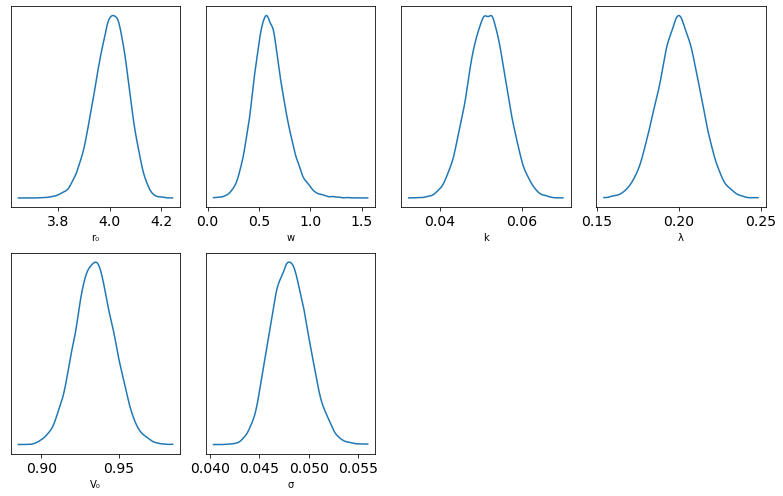

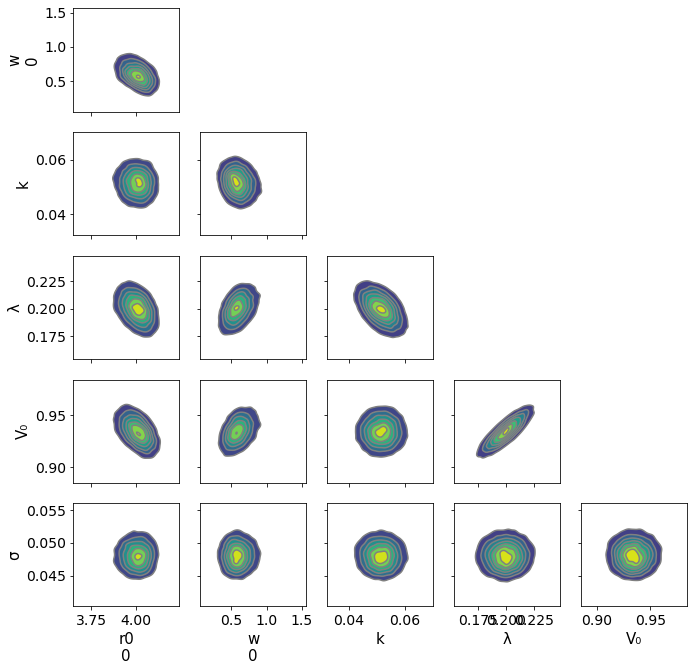

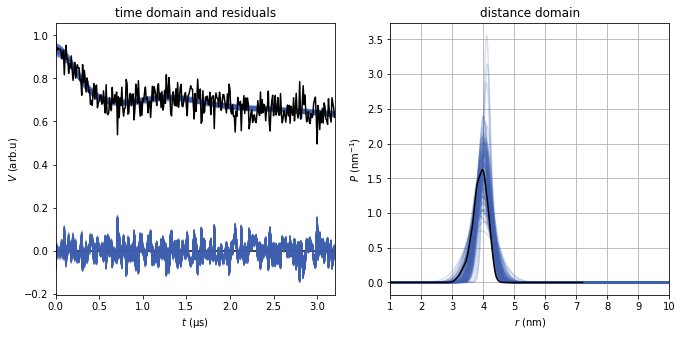

In [7]:
dive.summary(trace_gauss, model_gauss, Pid = Pid)  